# Earthquake Analysis in Indonesia, Japan, and Turkey (2008 - 2017)

## This Jupyter Notebook performs a comprehensive exploratory data analysis (EDA) on earthquake data from Indonesia, Japan, and Turkey between 2008 and 2017. The data is preprocessed, analyzed, and visualized to provide insights into earthquake frequency, magnitude trends, and regional comparisons.

## Data Import and Initial Preprocessing

In [4]:
# Display inline plots within Jupyter Notebook cells
%matplotlib inline

# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from datetime import datetime  # To handle date and time formats
import calendar  # To manipulate month and calendar operations

# Load earthquake data from CSV file into a DataFrame (Indonesia data)
df = pd.read_csv("/Users/radit/Downloads/TUGAS-PRAPROSES-EDA-DATMIN-KELOMPOK-3-main 2/katalog_gempa.csv")
df.head(5)  # Display the first 5 rows of the dataset

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


This section imports the necessary libraries and loads the Indonesian earthquake dataset from a CSV file into a DataFrame.

In [6]:
# Rename columns for better readability and convenience
df.rename(columns={'tgl': 'date', 'ot': 'time', 'lat': 'latitude', 'lon': 'longitude'}, inplace=True)
df.head(5)

,date,time,latitude,longitude,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


Columns are renamed for easier reference and clarity, particularly for dates and coordinates.

In [8]:
# Drop columns that are not needed for analysis
df.drop(['strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2'], axis=1, inplace=True)
df.head(5)

,date,time,latitude,longitude,depth,mag,remark
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea


Unnecessary columns such as strike1, dip1, etc., are dropped to simplify the dataset.

## Date Parsing and Feature Engineering

In [11]:
# Extract 'year', 'month', and 'day' components from 'date' column
df.loc[df['date'].str.contains('/'), 'tahun'] = df['date'].str.split('/').str[0]  # Extract year
df.loc[df['date'].str.contains('/'), 'bulan'] = df['date'].str.split('/').str[1]  # Extract month
df.loc[df['date'].str.contains('/'), 'tangal'] = df['date'].str.split('/').str[2]  # Extract day
df['bulan'] = df['bulan'].apply(lambda x: calendar.month_name[int(x)])  # Convert month number to month name
df['tahun'] = df['tahun'].astype("int")  # Convert 'tahun' column to integer type
df.head(10)

,date,time,latitude,longitude,depth,mag,remark,tahun,bulan,tangal
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,2008,November,01
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,2008,November,01
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,2008,November,01
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,2008,November,01
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,2008,November,01
5,2008/11/01,14:47:00.029,-7.37,105.31,18,3.3,Java - Indonesia,2008,November,01
6,2008/11/01,13:04:38.742,0.10,98.55,12,4.7,Northern Sumatra - Indonesia,2008,November,01
7,2008/11/01,10:23:51.646,-7.07,129.67,135,4.8,Banda Sea,2008,November,01
8,2008/11/01,09:50:32.503,-3.32,128.02,10,2.3,Seram - Indonesia,2008,November,01
9,2008/11/01,06:50:52.220,-4.43,127.45,10,3.2,Banda Sea,2008,November,01


Splits the date column to extract year, month, and day values and converts month numbers to month names using the calendar module.

In [13]:
# Extract 'city' and 'country' from 'remark' column based on delimiter '-'
df.loc[df['remark'].str.contains('-'), 'city'] = df['remark'].str.split('-').str[0].str[:-1]  # Extract city
df.loc[df['remark'].str.contains('-'), 'country'] = df['remark'].str.split('-').str[1].str[1:]  # Extract country
df.loc[~df['remark'].str.contains('-'), 'country'] = df.remark  # Assign country if no '-'
df.loc[df['city'].isna(), 'city'] = df.remark  # Assign city if missing

Extracts city and country values from the remark column if it contains a - delimiter. If not, assigns values based on the remark content.

In [15]:
# Assign specific 'country' values for known regions
df.loc[df['remark'].str.contains('Sulawesi'), 'country'] = "Indonesia"
# More region-based assignments...
df = df.drop(['remark', 'date'], axis=1)  # Drop unnecessary columns
df.head(10)

,time,latitude,longitude,depth,mag,tahun,bulan,tangal,city,country
0,21:02:43.058,-9.18,119.06,10,4.9,2008,November,01,Sumba Region,Indonesia
1,20:58:50.248,-6.55,129.64,10,4.6,2008,November,01,Banda Sea,Banda Sea
2,17:43:12.941,-7.01,106.63,121,3.7,2008,November,01,Java,Indonesia
3,16:24:14.755,-3.30,127.85,10,3.2,2008,November,01,Seram,Indonesia
4,16:20:37.327,-6.41,129.54,70,4.3,2008,November,01,Banda Sea,Banda Sea
5,14:47:00.029,-7.37,105.31,18,3.3,2008,November,01,Java,Indonesia
6,13:04:38.742,0.10,98.55,12,4.7,2008,November,01,Northern Sumatra,Indonesia
7,10:23:51.646,-7.07,129.67,135,4.8,2008,November,01,Banda Sea,Banda Sea
8,09:50:32.503,-3.32,128.02,10,2.3,2008,November,01,Seram,Indonesia
9,06:50:52.220,-4.43,127.45,10,3.2,2008,November,01,Banda Sea,Banda Sea


Assigns a consistent country value based on specific keywords found in the remark column.

## Filter and Count Earthquakes for Indonesia

In [18]:
# Filter data to keep only records from Indonesia
df = df[df['country'].str.contains('Indonesia')]
df.country.value_counts()  # Count the number of records per country (should only show Indonesia)

country
Indonesia    70161
Name: count, dtype: int64

Filters the dataset to include only rows where country is Indonesia.

In [20]:
# Display the distribution of 'depth' values
df.depth.value_counts().sort_index()

depth
2       6
3       8
4      16
5      60
6      11
       ..
732     1
738     1
741     1
745     1
750    14
Name: count, Length: 447, dtype: int64

Displays the frequency distribution of earthquake depths, sorted by index.

## Load and Preprocess Japan Earthquake Data

In [23]:
# Load earthquake data for Japan from CSV file
df1 = pd.read_csv("/Users/radit/Downloads/TUGAS-PRAPROSES-EDA-DATMIN-KELOMPOK-3-main 2/earthquake_japan.csv")
df1.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us


Loads the Japanese earthquake dataset into a DataFrame.

In [25]:
# Drop columns that are not needed
df1.drop(['magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'], axis=1, inplace=True)
df1.head(5)

,time,latitude,longitude,depth,mag,place
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia"
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan"
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan"
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia"
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan"


Removes unnecessary columns to focus on relevant data.

In [27]:
# Extract date and time components
df1['tanggal'] = df1['time'].str.split('T').str[0]  # Extract date
df1['time'] = df1['time'].str.split('T').str[1].str.replace('Z', '')  # Extract and clean time
df1['tahun'] = df1['tanggal'].str.split('-').str[0]  # Extract year
df1['bulan'] = df1['tanggal'].str.split('-').str[1].apply(lambda x: calendar.month_name[int(x)])  # Convert month
df1['tanggal'] = df1['tanggal'].str.split('-').str[2]  # Extract day
df1['time'] = df1['time'].str.split('.').str[0]  # Clean time format
df1.head(10)

,time,latitude,longitude,depth,mag,place,tanggal,tahun,bulan
0,14:34:20,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia",27,2018,November
1,23:33:50,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",26,2018,November
2,13:04:02,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan",26,2018,November
3,05:20:16,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia",26,2018,November
4,09:19:05,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan",25,2018,November
5,03:16:46,48.4158,155.0325,35.00,4.6,"263km SSW of Severo-Kuril'sk, Russia",25,2018,November
6,14:30:14,37.1821,141.1721,46.76,5.2,"29km ENE of Iwaki, Japan",23,2018,November
7,07:19:51,29.3424,142.3121,10.00,4.7,"250km N of Chichi-shima, Japan",23,2018,November
8,20:16:02,44.4524,148.0753,101.46,4.7,"88km S of Kuril'sk, Russia",20,2018,November
9,19:09:48,30.4087,130.0687,123.00,5.5,"96km WSW of Nishinoomote, Japan",20,2018,November


Splits the time string to extract date and time components and converts month numbers to names.

In [29]:
# Parse 'country' and 'city' from 'place'
df1.loc[df1['place'].str.contains(','), 'country'] = df1['place'].str.split(',').str[1].str[1:]
df1.loc[~df1['place'].str.contains(','), 'country'] = df1.place
df1.loc[df1['place'].str.contains(','), 'city'] = df1['place'].str.split(' of ').str[1]
df1.loc[df1['place'].str.contains(','), 'city'] = df1['city'].str.split(',').str[0]
df1.loc[df1['city'].isna(), 'city'] = df1.place
df1.head(10)

,time,latitude,longitude,depth,mag,place,tanggal,tahun,bulan,country,city
0,14:34:20,48.3780,154.9620,35.00,4.9,"269km SSW of Severo-Kuril'sk, Russia",27,2018,November,Russia,Severo-Kuril'sk
1,23:33:50,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",26,2018,November,Japan,Sakai
2,13:04:02,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan",26,2018,November,Japan,Ofunato
3,05:20:16,50.0727,156.1420,66.34,4.6,"67km S of Severo-Kuril'sk, Russia",26,2018,November,Russia,Severo-Kuril'sk
4,09:19:05,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan",25,2018,November,Japan,Komatsushima
5,03:16:46,48.4158,155.0325,35.00,4.6,"263km SSW of Severo-Kuril'sk, Russia",25,2018,November,Russia,Severo-Kuril'sk
6,14:30:14,37.1821,141.1721,46.76,5.2,"29km ENE of Iwaki, Japan",23,2018,November,Japan,Iwaki
7,07:19:51,29.3424,142.3121,10.00,4.7,"250km N of Chichi-shima, Japan",23,2018,November,Japan,Chichi-shima
8,20:16:02,44.4524,148.0753,101.46,4.7,"88km S of Kuril'sk, Russia",20,2018,November,Russia,Kuril'sk
9,19:09:48,30.4087,130.0687,123.00,5.5,"96km WSW of Nishinoomote, Japan",20,2018,November,Japan,Nishinoomote


Extracts and cleans country and city values based on content in the place column.

In [31]:
# Assign consistent 'country' value for known regions in Japan
df1.loc[df1['country'].str.contains('Japan'), 'country'] = "Japan"
df1 = df1[df1['country'].str.contains('Japan')]  # Filter data for Japan
df1 = df1.drop(['place'], axis=1)  # Drop 'place' column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10894 entries, 1 to 14091
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       10894 non-null  object 
 1   latitude   10894 non-null  float64
 2   longitude  10894 non-null  float64
 3   depth      10894 non-null  float64
 4   mag        10894 non-null  float64
 5   tanggal    10894 non-null  object 
 6   tahun      10894 non-null  object 
 7   bulan      10894 non-null  object 
 8   country    10894 non-null  object 
 9   city       10894 non-null  object 
dtypes: float64(4), object(6)
memory usage: 936.2+ KB


Ensures country is consistently labeled as Japan for relevant records and filters the dataset accordingly.

## Load and Preprocess Turkey Earthquake Data

In [34]:
# Load earthquake data for Turkey
df2 = pd.read_csv("/Users/radit/Downloads/TUGAS-PRAPROSES-EDA-DATMIN-KELOMPOK-3-main 2/earthquake_turkey.csv")
df2.head(5)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


Loads the Turkey earthquake dataset into a DataFrame.

In [36]:
# Drop and rename columns
df2.drop(['id'], axis=1, inplace=True)
df2.rename(columns={'lat': 'latitude', 'lon': 'longitude'}, inplace=True)
df2.head(5)

,date,time,latitude,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


Drops id column and renames lat and lon columns for consistency.

In [38]:
# Extract date components and convert time format
df2['tahun'] = df2['date'].str.split('.').str[0]
df2['bulan'] = df2['date'].str.split('.').str[1].apply(lambda x: calendar.month_name[int(x)])
df2['tanggal'] = df2['date'].str.split('.').str[2]
df2['time'] = df2['time'].apply(lambda x: datetime.strptime(x, "%I:%M:%S %p").strftime("%H:%M:%S"))

Extracts year, month, day from date and formats time into a consistent 24-hour format.

In [40]:
# Drop more columns and clean 'country' values
df2.drop(['direction', 'dist', 'mw', 'ms', 'date'], axis=1, inplace=True)
df2.loc[df2['country'].str.contains('turkey|turkiye|aegeansea|cyprus|blacksea', case=False), 'country'] = "Turkey"
df2 = df2[df2['country'].str.contains('Turkey')]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13943 entries, 0 to 24006
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      13943 non-null  object 
 1   latitude  13943 non-null  float64
 2   long      13943 non-null  float64
 3   country   13943 non-null  object 
 4   city      11754 non-null  object 
 5   area      11735 non-null  object 
 6   depth     13943 non-null  float64
 7   xm        13943 non-null  float64
 8   md        13943 non-null  float64
 9   richter   13943 non-null  float64
 10  mb        13943 non-null  float64
 11  tahun     13943 non-null  object 
 12  bulan     13943 non-null  object 
 13  tanggal   13943 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.6+ MB


Drops more columns and standardizes country labeling for Turkey.

## Visualization: Earthquake Counts and Trends (2008 - 2017)

## Earthquake Counts Per Country

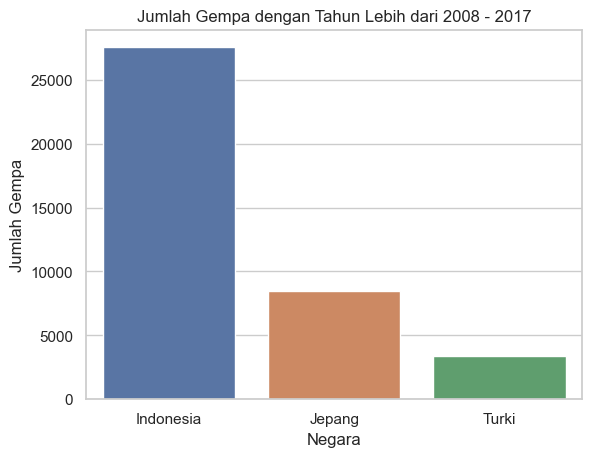

In [44]:
df['tahun'] = df['tahun'].astype(int)
df1['tahun'] = df1['tahun'].astype(int)
df2['tahun'] = df2['tahun'].astype(int)

# Filter data for selected years
data_indonesia = df[(df['tahun'] > 2007) & (df['tahun'] < 2018)]
data_japan = df1[(df1['tahun'] > 2007) & (df1['tahun'] < 2018)]
data_turkey = df2[(df2['tahun'] > 2007)]

# Count the number of earthquakes per country
count_indonesia = data_indonesia.shape[0]
count_japan = data_japan.shape[0]
count_turkey = data_turkey.shape[0]

# Bar plot for earthquake counts
sns.set(style='whitegrid')
sns.barplot(x=['Indonesia', 'Jepang', 'Turki'], y=[count_indonesia, count_japan, count_turkey])
plt.title('Jumlah Gempa dengan Tahun Lebih dari 2008 - 2017')
plt.xlabel('Negara')
plt.ylabel('Jumlah Gempa')
plt.show()

The bar plot shows the total number of earthquakes recorded from 2008 to 2017 for three countries: Indonesia, Japan, and Turkey. Indonesia, represented by the tall blue bar, has the highest number of recorded earthquakes, far exceeding the counts for Japan and Turkey. Japan, depicted with a brown bar, has fewer recorded earthquakes compared to Indonesia but a higher count than Turkey. Turkey, indicated by the green bar, has the lowest number of recorded earthquakes. This data suggests that Indonesia experienced the highest seismic activity during the specified period, while Turkey had the least. The variation in earthquake frequency may reflect differing tectonic activity, monitoring capabilities, or geological conditions in these regions.

## Earthquake Frequency by Year

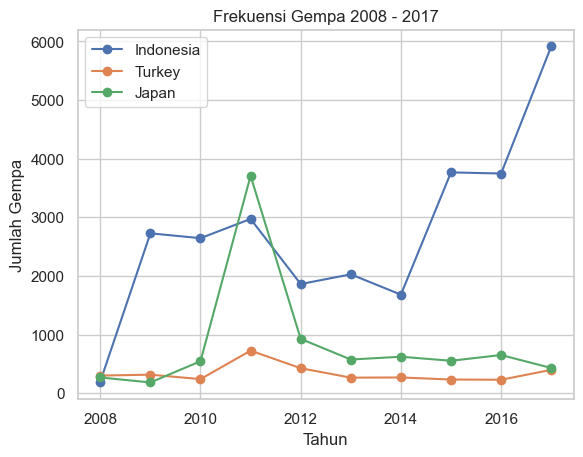

In [47]:
# Group data by year and plot earthquake frequency
jumlah_gempa_indonesia = data_indonesia.groupby('tahun').size()
jumlah_gempa_turkey = data_turkey.groupby('tahun').size()
jumlah_gempa_japan = data_japan.groupby('tahun').size()

plt.plot(jumlah_gempa_indonesia.index, jumlah_gempa_indonesia.values, label='Indonesia', marker='o', linestyle='-')
plt.plot(jumlah_gempa_turkey.index, jumlah_gempa_turkey.values, label='Turkey', marker='o', linestyle='-')
plt.plot(jumlah_gempa_japan.index, jumlah_gempa_japan.values, label='Japan', marker='o', linestyle='-')

plt.title('Frekuensi Gempa 2008 - 2017')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Gempa')
plt.legend()
plt.grid(True)
plt.show()

The line plot illustrates the frequency of earthquakes recorded annually from 2008 to 2017 for Indonesia, Turkey, and Japan. The x-axis represents the years, while the y-axis shows the number of earthquakes. The data series for Indonesia is marked by a blue line, Turkey by an orange line, and Japan by a green line.

Key Observations:
Indonesia displays a generally increasing trend in earthquake frequency over the years, with a sharp spike in 2017.
Japan experienced a peak in earthquake frequency around 2011, likely reflecting significant seismic events such as the 2011 Tōhoku earthquake, followed by a noticeable decline and subsequent stability at lower levels in subsequent years.
Turkey consistently shows lower and relatively stable earthquake frequencies throughout the observed years, with minimal fluctuation.
This plot suggests a strong rise in earthquake activity in Indonesia, particularly in recent years, while Japan had a major surge in 2011 before returning to more typical levels. Turkey's consistent, lower frequency may reflect differing tectonic activity or reporting practices.

## Average Magnitude Per Year

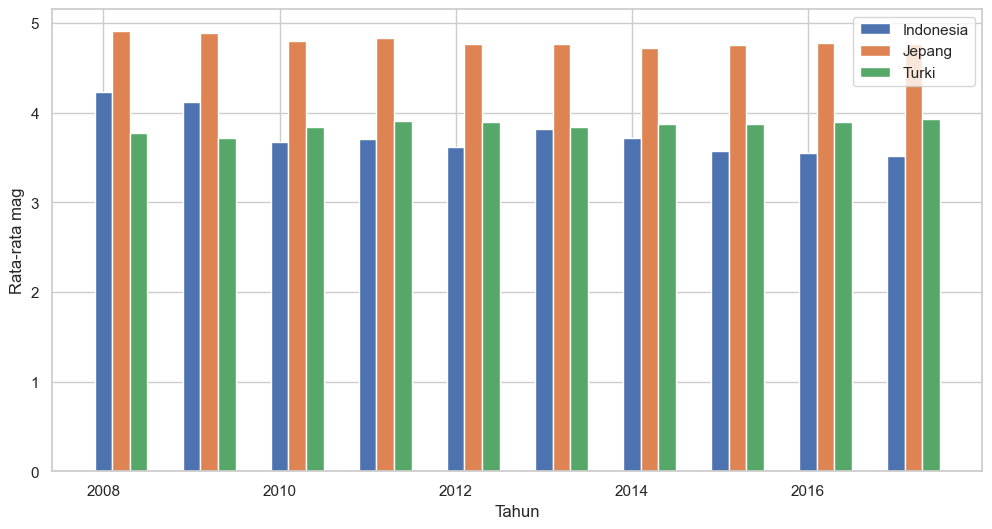

In [50]:
# Calculate average magnitude per year
data_rata_mag_indonesia = data_indonesia.groupby('tahun')['mag'].mean()
data_rata_mag_japan = data_japan.groupby('tahun')['mag'].mean()
data_rata_xm_turkey = data_turkey.groupby('tahun')['xm'].mean()

# Merge data and plot average magnitudes
data_perbandingan_rata = pd.merge(data_rata_mag_indonesia, data_rata_mag_japan, on='tahun', how='inner')
data_perbandingan_rata = pd.merge(data_perbandingan_rata, data_rata_xm_turkey, on='tahun', how='inner')

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each bar
x = data_perbandingan_rata.index

ax.bar(x, data_perbandingan_rata['mag_x'], width=width, label='Indonesia')
ax.bar([i + width for i in x], data_perbandingan_rata['mag_y'], width=width, label='Jepang')
ax.bar([i + 2 * width for i in x], data_perbandingan_rata['xm'], width=width, label='Turki')

ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata mag')
ax.legend()
plt.show()

The bar plot illustrates the average magnitude trends across Indonesia, Japan, and Turkey from 2008 to 2016. Japan consistently exhibits the highest average magnitude, indicating a more significant frequency or intensity of the measured phenomenon compared to Indonesia and Turkey. Indonesia maintains a moderate average, lower than Japan but higher than Turkey, while Turkey consistently records the lowest average magnitude among the three. Across all years, each country shows relatively stable trends, suggesting consistent conditions within the measured timeframe. The stability and consistent differences highlight the varying intensity or frequency of the phenomenon across these countries.

## City-Based Earthquake Counts

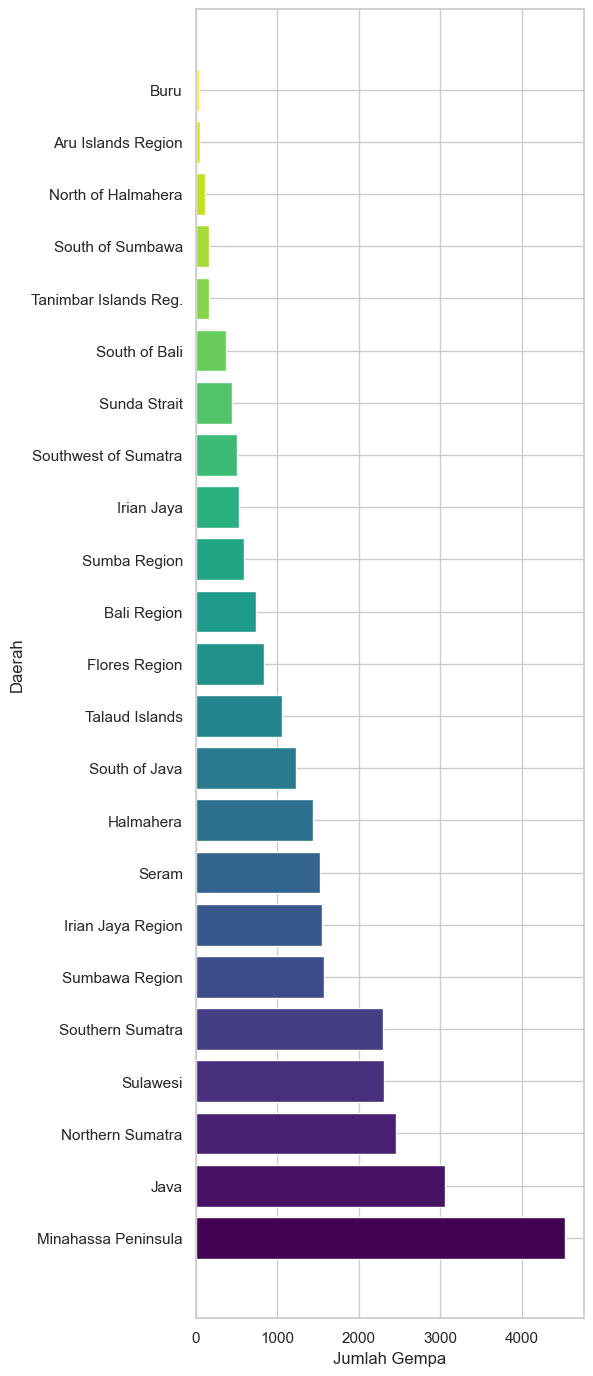

In [53]:
# Plot earthquake counts for each city in Indonesia
jumlah_gempa_daerah_indonesia = data_indonesia.groupby('city').size().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(5, 17))
colors = plt.cm.viridis(np.linspace(0, 1, len(jumlah_gempa_daerah_indonesia)))
x = jumlah_gempa_daerah_indonesia.index
y = jumlah_gempa_daerah_indonesia.values
ax.barh(x, y, color=colors)
ax.set_xlabel('Jumlah Gempa')
ax.set_ylabel('Daerah')
plt.show()

The horizontal bar chart displays the number of earthquakes recorded across various regions in Indonesia. Each bar represents a specific region, with the length of the bar indicating the total number of earthquakes. The x-axis shows the count of earthquakes, while the y-axis lists the regions.

Key Observations:
Minahassa Peninsula experienced the highest number of earthquakes among the listed regions, as represented by the longest bar.
Java, Northern Sumatra, and Sulawesi also show relatively high counts, indicating significant seismic activity in these regions.
Regions such as Buru, Aru Islands Region, and North of Halmahera show comparatively lower earthquake frequencies, as reflected by their shorter bars.
The data suggests a varied distribution of seismic activity across Indonesia, with certain regions experiencing notably more frequent earthquakes, likely due to specific tectonic or geological characteristics.
Overall, the chart highlights Indonesia's seismic hotspots, particularly in areas such as the Minahassa Peninsula, and provides insight into the distribution and frequency of earthquakes across different regions of the country.

## Depth vs. Magnitude Scatter Plot Comparison

/Users/radit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/f9/xckwjfz15rs06w8m872d47nh0000gn/T/ipykernel_37397/1379743899.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

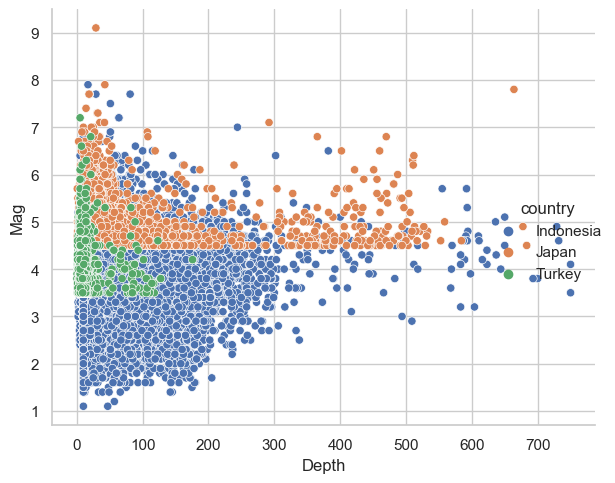

In [56]:
# Combine data from all three countries for scatter plot
data_gabungan_indonesia = data_indonesia[['depth', 'mag', 'country']].copy()
data_gabungan_japan = data_japan[['depth', 'mag', 'country']].copy()
data_gabungan_turkey = data_turkey[['depth', 'xm', 'country']].copy()

# Rename 'xm' to 'mag' for consistency
data_gabungan_turkey = data_gabungan_turkey.rename(columns={'xm': 'mag'})
data_gabungan = pd.concat([data_gabungan_indonesia, data_gabungan_japan, data_gabungan_turkey])

# Scatter plot of depth vs magnitude
plt.figure(figsize=(10, 6))
g = sns.relplot(data=data_gabungan, x='depth', y='mag', hue='country', kind='scatter')
g.set_axis_labels("Depth", "Mag")
plt.tight_layout()
plt.show()

The scatter plot depicts the relationship between earthquake depth (x-axis) and magnitude (y-axis) for three countries: Indonesia, Japan, and Turkey, represented by blue, orange, and green dots respectively.

Key Observations:
Indonesia (blue): Most of the earthquakes have lower depths (predominantly below 200 km) but a broad range of magnitudes, indicating a wide distribution of seismic events from low to higher magnitudes.
Japan (orange): Earthquakes span a broader range of depths compared to Indonesia, reaching deeper into the Earth's crust, with magnitudes clustering around the mid to higher levels. This distribution suggests frequent deep-focus seismic activity.
Turkey (green): Limited data points compared to the other countries, with most earthquakes clustered around lower depths and magnitudes, indicating lower frequency or less intense seismic events.
This plot illustrates how seismic activity characteristics vary significantly by country, with Indonesia and Japan showing higher magnitude events at varying depths, while Turkey generally displays less frequent and lower-magnitude seismic activity. The distribution of points suggests differing tectonic dynamics, with Japan showing a tendency for deeper seismic events.

## Conclusion

The data visualizations provide a comprehensive overview of earthquake activity across Indonesia, Japan, and Turkey, highlighting significant patterns and variations. Indonesia consistently shows the highest frequency of earthquakes, reflecting high seismic activity, while Turkey experiences the least activity with relatively stable, low-frequency events. Japan, in contrast, demonstrates a notable peak in activity around 2011, attributed to major seismic events, before stabilizing in subsequent years. The average magnitude plot indicates Japan as the country with the highest magnitude earthquakes on average, while Turkey remains the lowest. Regionally within Indonesia, the Minahassa Peninsula, Java, and Northern Sumatra emerge as seismic hotspots, with wide-ranging distribution across different depths and magnitudes. The scatter plot further illustrates the relationship between earthquake depth and magnitude, with Indonesia showing a broad range of magnitudes at shallower depths, Japan experiencing deeper seismic events, and Turkey having fewer, lower-intensity occurrences. Collectively, these insights reflect the complex and varied tectonic dynamics influencing seismic behavior in these regions, underscoring both the geographical and geological differences driving earthquake characteristics.